# Notebook to run bayesian models

This notebook runs the bayesian linear regression models and the mixed effects models. It is done in notebook form as notebooks keep the diagnostics in the cell output. 

Bayesian model analysis is done in the bayes_model_analysis notebook

In [2]:
from functions.data_functions import load_data, save_pickle, load_pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import bambi as bmb
import arviz as az

## Read in data and preprocess data

In [3]:
pca_df = load_data('BEACON', 'pca_df')

In [4]:
comp = ['comp_1', 'comp_2','comp_3']

In [5]:
for component in comp:
    pca_df[f'{component}_t1_demean'] = pca_df[f'{component}_t1'] - pca_df[f'{component}_t1'].mean()

pca_df['group_ind'] = pca_df['group'].apply(lambda group: 0 if group =='HC' else 1)

In [6]:
pca_df

index G_Number  comp_1_t1  comp_2_t1  comp_3_t1 B_Number  comp_1_t2  \
0        0    G1038  -3.397712  -0.039728   0.044067    B1002  -2.751847   
1        1    G1010  -3.759757  -0.312506   0.406467    B1003  -3.441539   
2        2    G1014  -3.532270  -0.211892   0.493511    B1004  -1.389329   
3        3    G1056  -2.459692  -0.062705  -0.095992    B1006  -1.050591   
4        4    G1023  -1.476319  -0.129427   1.175674    B1007  -1.181176   
..     ...      ...        ...        ...        ...      ...        ...   
129    129    G2141   2.462581  -0.667664  -0.436650    B2091   2.025310   
130    130    G2138  -1.634660  -0.686854  -1.347601    B2092   0.157375   
131    131    G2140   2.637032  -2.079384  -1.025924    B2093   3.998414   
132    132    G2105   2.295672  -0.339904   0.279827    B2094   4.474773   
133    133    G2049  -0.641519   3.309164   0.048438    B2095  -1.348737   

     comp_2_t2  comp_3_t2 group  comp_1_t1_demean  comp_2_t1_demean  \
0    -1.763316   2.199746    HC         -3.397712         -0.039728   
1    -0.316748  -0.210088    HC         -3.759757         -0.312506   
2     0.311159   0.983941    HC         -3.532270         -0.211892   
3     1.116984   0.019420    HC         -2.459692         -0.062705   
4    -0.783917   0.744101    HC         -1.476319         -0.129427   
..         ...        ...   ...               ...               ...   
129   1.042486  -0.784687    AN          2.462581         -0.667664   
130  -0.139806  -0.360662    AN         -1.634660         -0.686854   
131  -2.064403  -1.245633    AN          2.637032         -2.079384   
132  -1.406758   0.090732    AN          2.295672         -0.339904   
133  -0.183591   0.249429    AN         -0.641519          3.309164   

     comp_3_t1_demean  group_ind  
0            0.044067          0  
1            0.406467          0  
2            0.493511          0  
3           -0.095992          0  
4            1.175674          0  
..                ...        ...  
129         -0.436650          1  
130         -1.347601          1  
131         -1.025924          1  
132          0.279827          1  
133          0.048438          1  

[134 rows x 14 columns]

## Difference at time point one

In [6]:
t1_models = {}

for component in comp:
    ttest = bmb.Model(f'{component}_t1 ~ 0 + group', data=pca_df.dropna())
    print(ttest)
    ttest_results = ttest.fit()
    t1_models[component] = ttest_results

Formula: comp_1_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [13.4206 13.4206])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.4565)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_1_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


Formula: comp_2_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.477 5.477])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0025)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_2_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


Formula: comp_3_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.1912 5.1912])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9502)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_3_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [7]:
save_pickle('t1_models', t1_models)

comp_1 

comp_2 

comp_3 



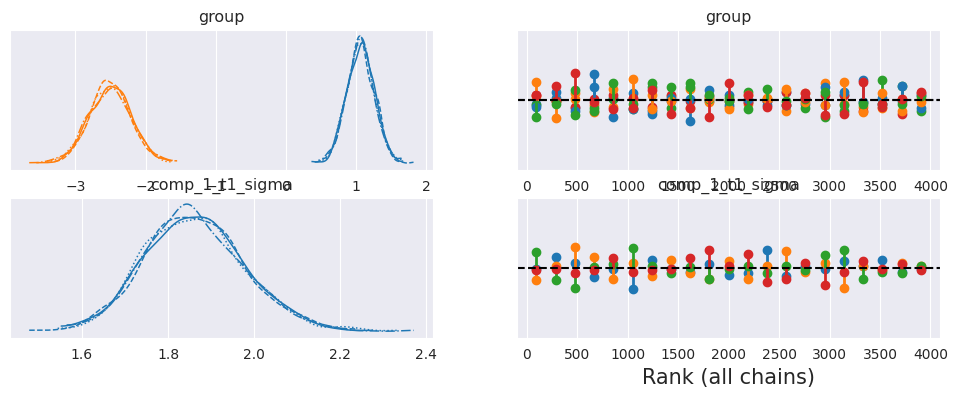

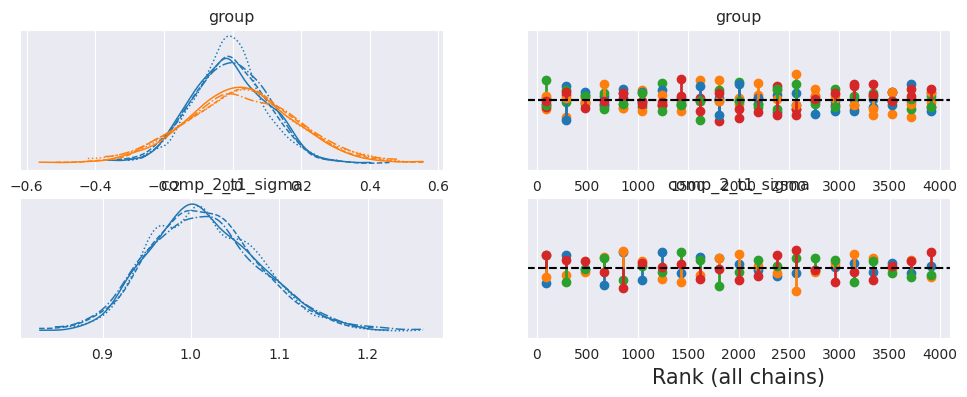

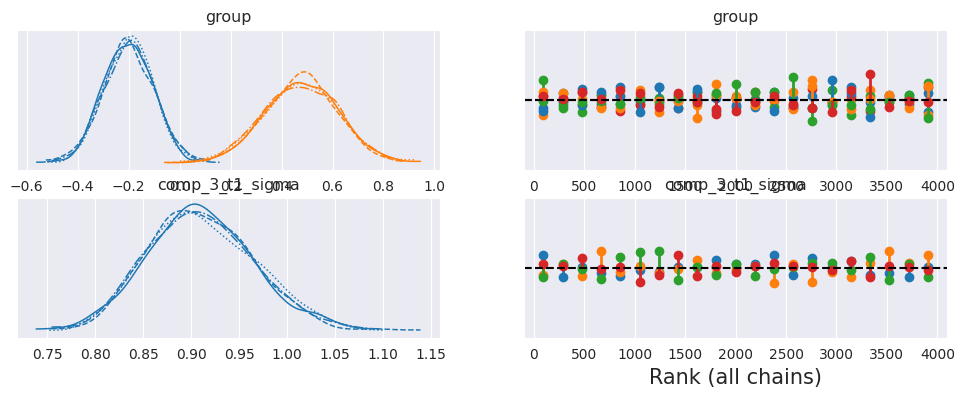

In [8]:
for model in t1_models.keys():
    print(model, '\n')
    az.plot_trace(t1_models[model], kind="rank_vlines")

In [9]:
t2_models = {}

for component in comp:
    ttest_t2 = bmb.Model(f'{component}_t2 ~ 0 + group', data=pca_df.dropna())
    print(ttest_t2)
    ttest_t2_results = ttest_t2.fit()
    t2_models[component] = ttest_t2_results

Formula: comp_1_t2 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [12.8721 12.8721])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.3561)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_1_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


Formula: comp_2_t2 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.7922 5.7922])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0602)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_2_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


Formula: comp_3_t2 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.2097 5.2097])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9536)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_3_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [10]:
save_pickle('t2_models', t2_models)

comp_1 

comp_2 

comp_3 



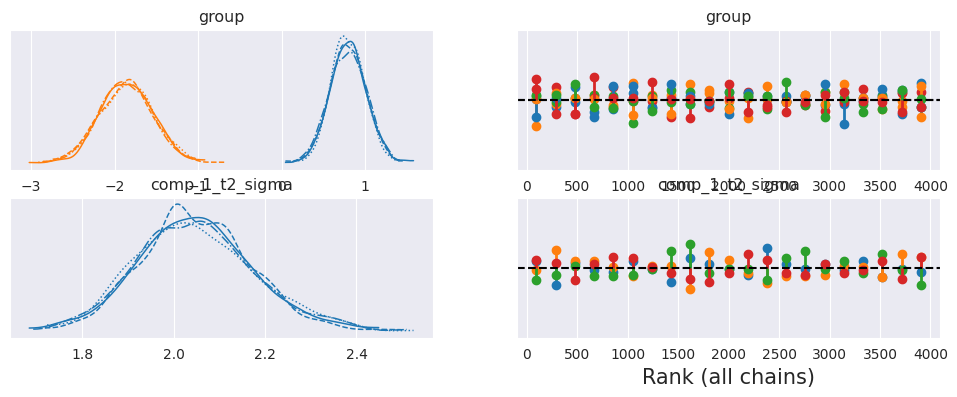

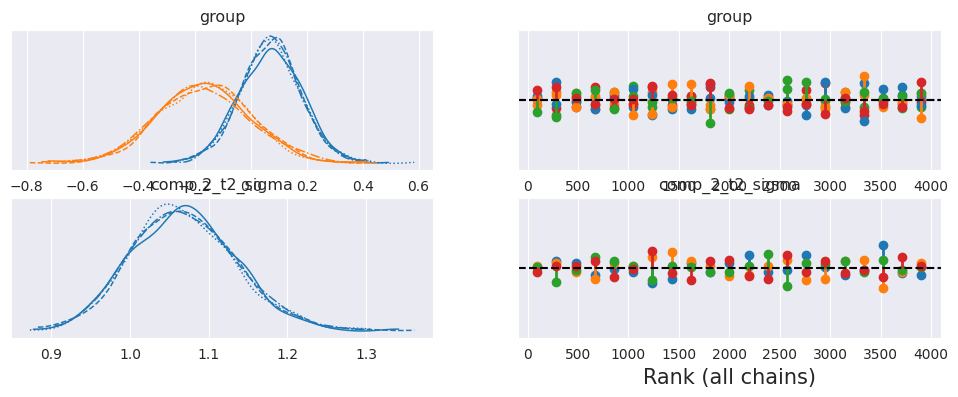

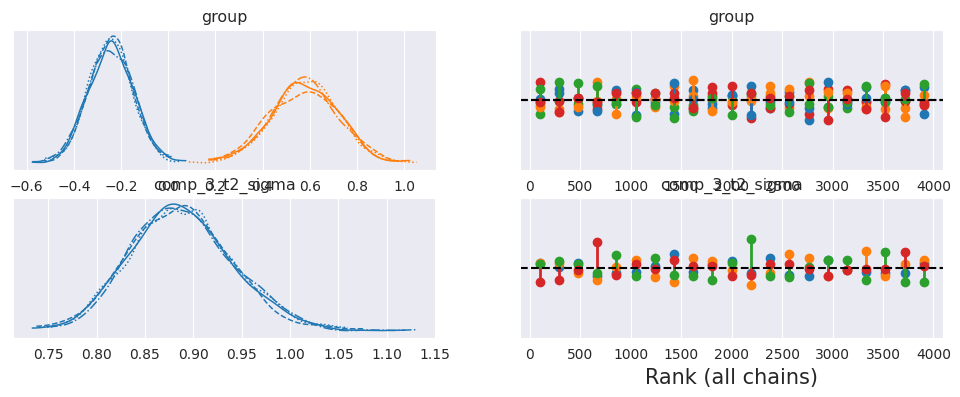

In [11]:
for model in t2_models.keys():
    print(model, '\n')
    az.plot_trace(t2_models[model], kind="rank_vlines")

## Defining and fitting the models

In [7]:
models = {
    'null':{},
    'alternative':{}
}

pca_df = pca_df.rename(columns={'G_Number':'participants'})
for model_component in comp:
    null = bmb.Model(f'{model_component}_t2 ~ 0 + (0 + {model_component}_t1_demean|participants)', data=pca_df, noncentered=False)
    alternative = bmb.Model(f'{model_component}_t2 ~ 0 + {model_component}_t1_demean + group + (0 + {model_component}_t1_demean|group)', data=pca_df, noncentered=False)

    models['null'][f'{model_component}'] = null
    models['alternative'][f'{model_component}'] = alternative


In [8]:
for alternative_model in models['alternative'].keys():
    print(models['alternative'][alternative_model], '\n')

Formula: comp_1_t2 ~ 0 + comp_1_t1_demean + group + (0 + comp_1_t1_demean|group)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    comp_1_t1_demean ~ Normal(mu: 0.0, sigma: 2.3978)
    group ~ Normal(mu: [0. 0.], sigma: [12.8721 12.8721])

  Group-level effects
    comp_1_t1_demean|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.3978))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.3561) 

Formula: comp_2_t2 ~ 0 + comp_2_t1_demean + group + (0 + comp_2_t1_demean|group)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    comp_2_t1_demean ~ Normal(mu: 0.0, sigma: 2.6439)
    group ~ Normal(mu: [0. 0.], sigma: [5.7922 5.7922])

  Group-level effects
    comp_2_t1_demean|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.6439))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0602) 

Formula: comp_3_t2 ~ 0 + comp_3_t1_demean + group + (0 + comp_3_t1_demean|group)
Family name: Gaus

In [9]:
for null_models in models['null'].keys():
    print(models['null'][null_models], '\n')

Formula: comp_1_t2 ~ 0 + (0 + comp_1_t1_demean|participants)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Group-level effects
    comp_1_t1_demean|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.3978))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.3561) 

Formula: comp_2_t2 ~ 0 + (0 + comp_2_t1_demean|participants)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Group-level effects
    comp_2_t1_demean|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.6439))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0602) 

Formula: comp_3_t2 ~ 0 + (0 + comp_3_t1_demean|participants)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Group-level effects
    comp_3_t1_demean|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.5089))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9536) 



In [10]:
draw_numb = 2000
tune_numb = 3500
target_accept_numb = 0.95

In [11]:
fitted_models ={
    'null':{},
    'alternative':{}
}

for alternative_model in models['alternative'].keys():
    alternative_fitted = models['alternative'][alternative_model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    print('\n')
    fitted_models['alternative'][alternative_model] = alternative_fitted

for null_model in models['null'].keys():
    null_fitted = models['null'][null_model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    print('\n')
    fitted_models['null'][null_model] = null_fitted

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_1_t1_demean, group, comp_1_t1_demean|group_sigma, comp_1_t1_demean|group, comp_1_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 142 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8185, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.906, but should be close to 0.95. Try to increase the number of tuning steps.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_2_t1_demean, group, comp_2_t1_demean|group_sigma, comp_2_t1_demean|group, comp_2_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 140 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8024, but should be close to 0.95. Try to increase the number of tuning steps.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8996, but should be close to 0.95. Try to increase the number of tuning steps.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_3_t1_demean, group, comp_3_t1_demean|group_sigma, comp_3_t1_demean|group, comp_3_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 139 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8309, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_1_t1_demean|participants_sigma, comp_1_t1_demean|participants, comp_1_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 67 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_2_t1_demean|participants_sigma, comp_2_t1_demean|participants, comp_2_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 59 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_3_t1_demean|participants_sigma, comp_3_t1_demean|participants, comp_3_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 52 seconds.


In [12]:
save_pickle('fitted_models_group', fitted_models)

## MCMC/model diagnositics

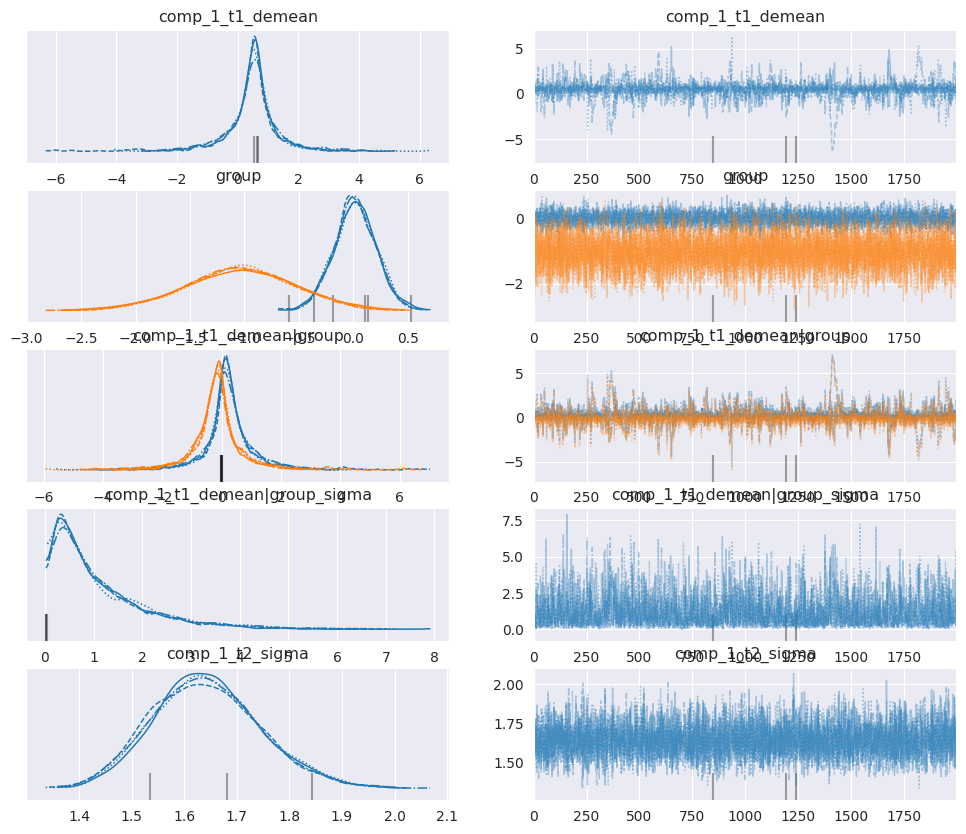

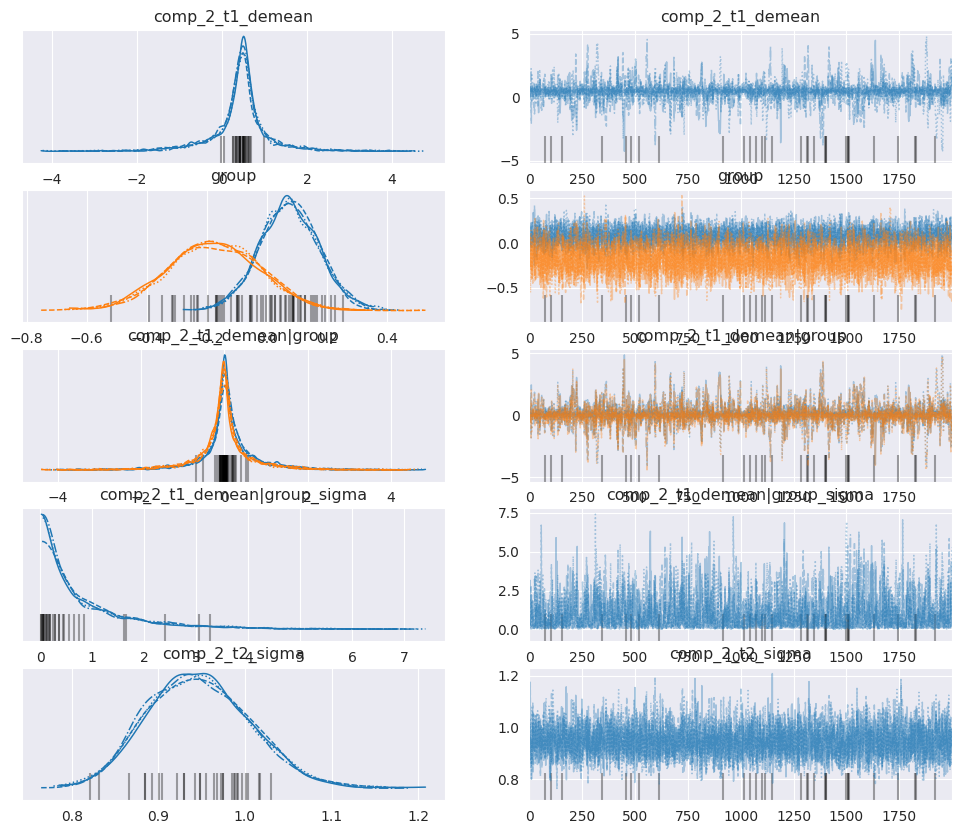

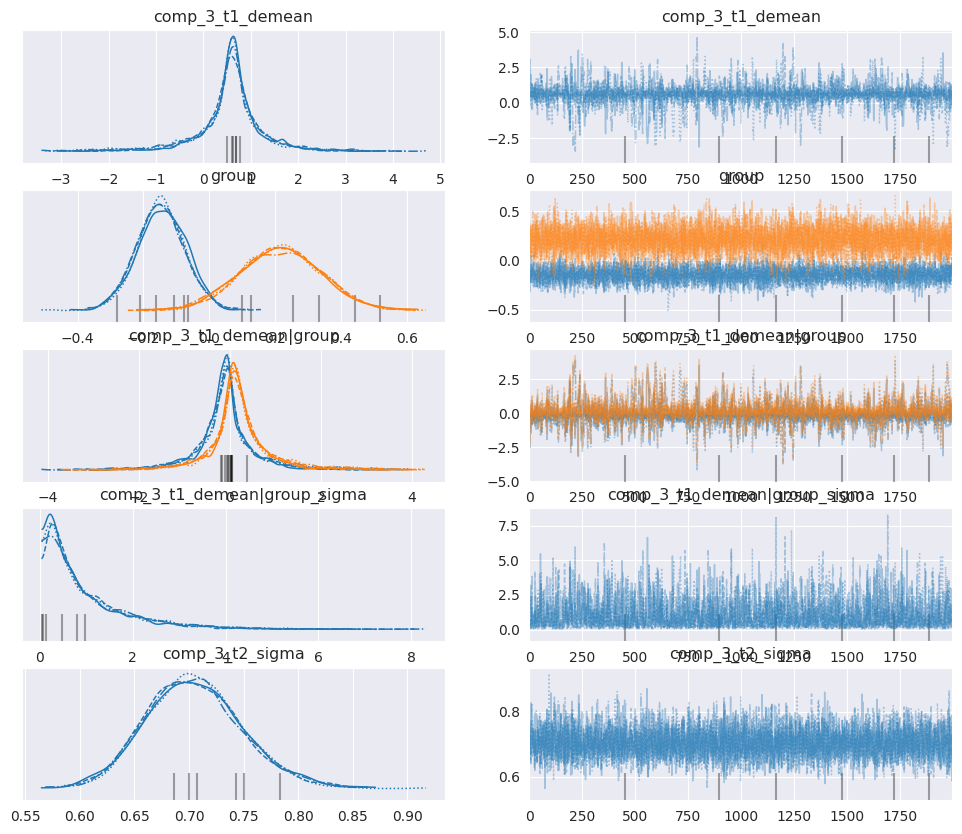

In [13]:
for model in comp:
    az.plot_trace(fitted_models['alternative'][model])

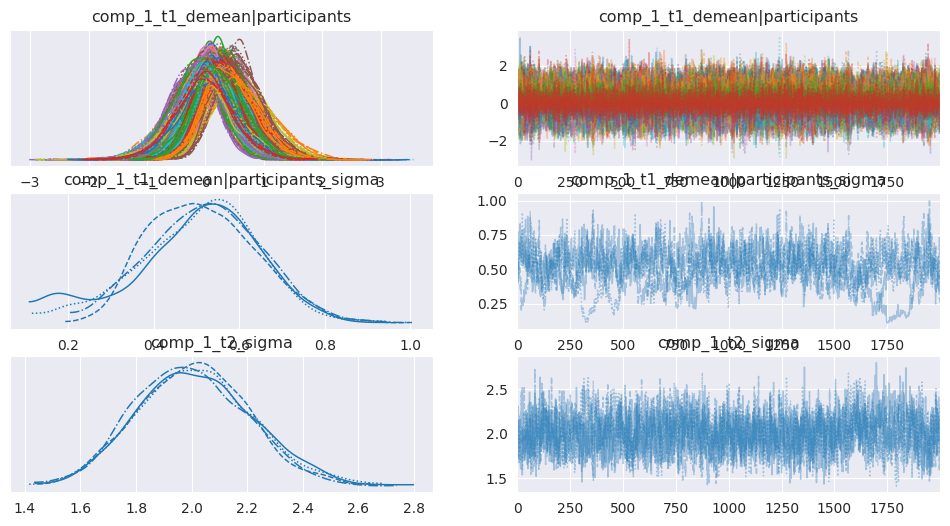

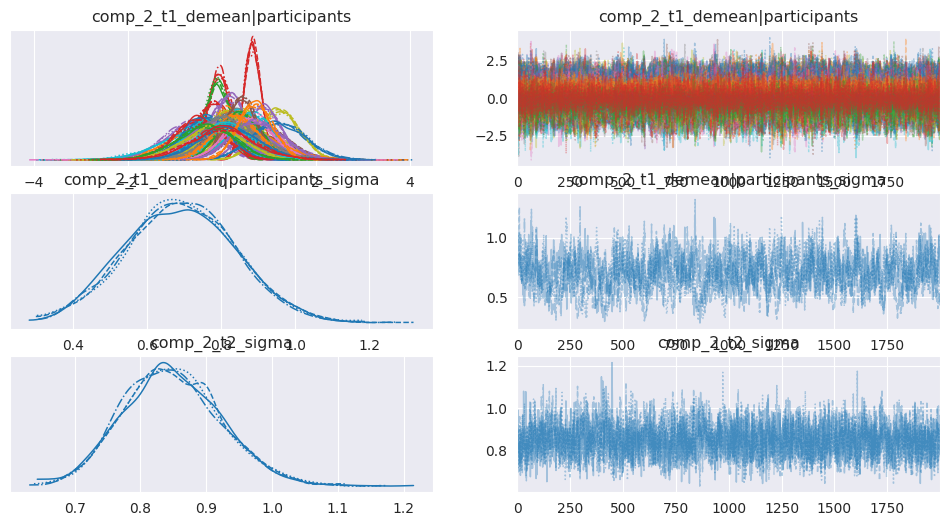

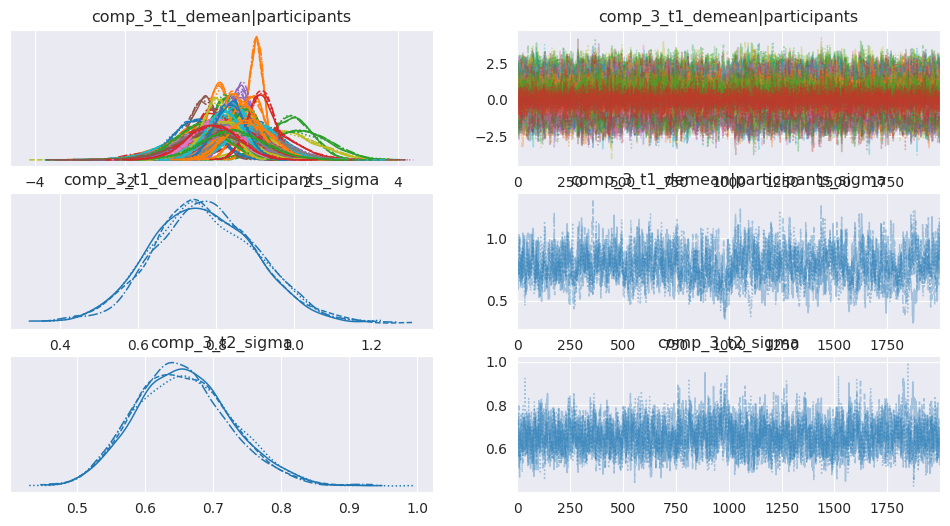

In [14]:
for model in comp:
    az.plot_trace(fitted_models['null'][model])

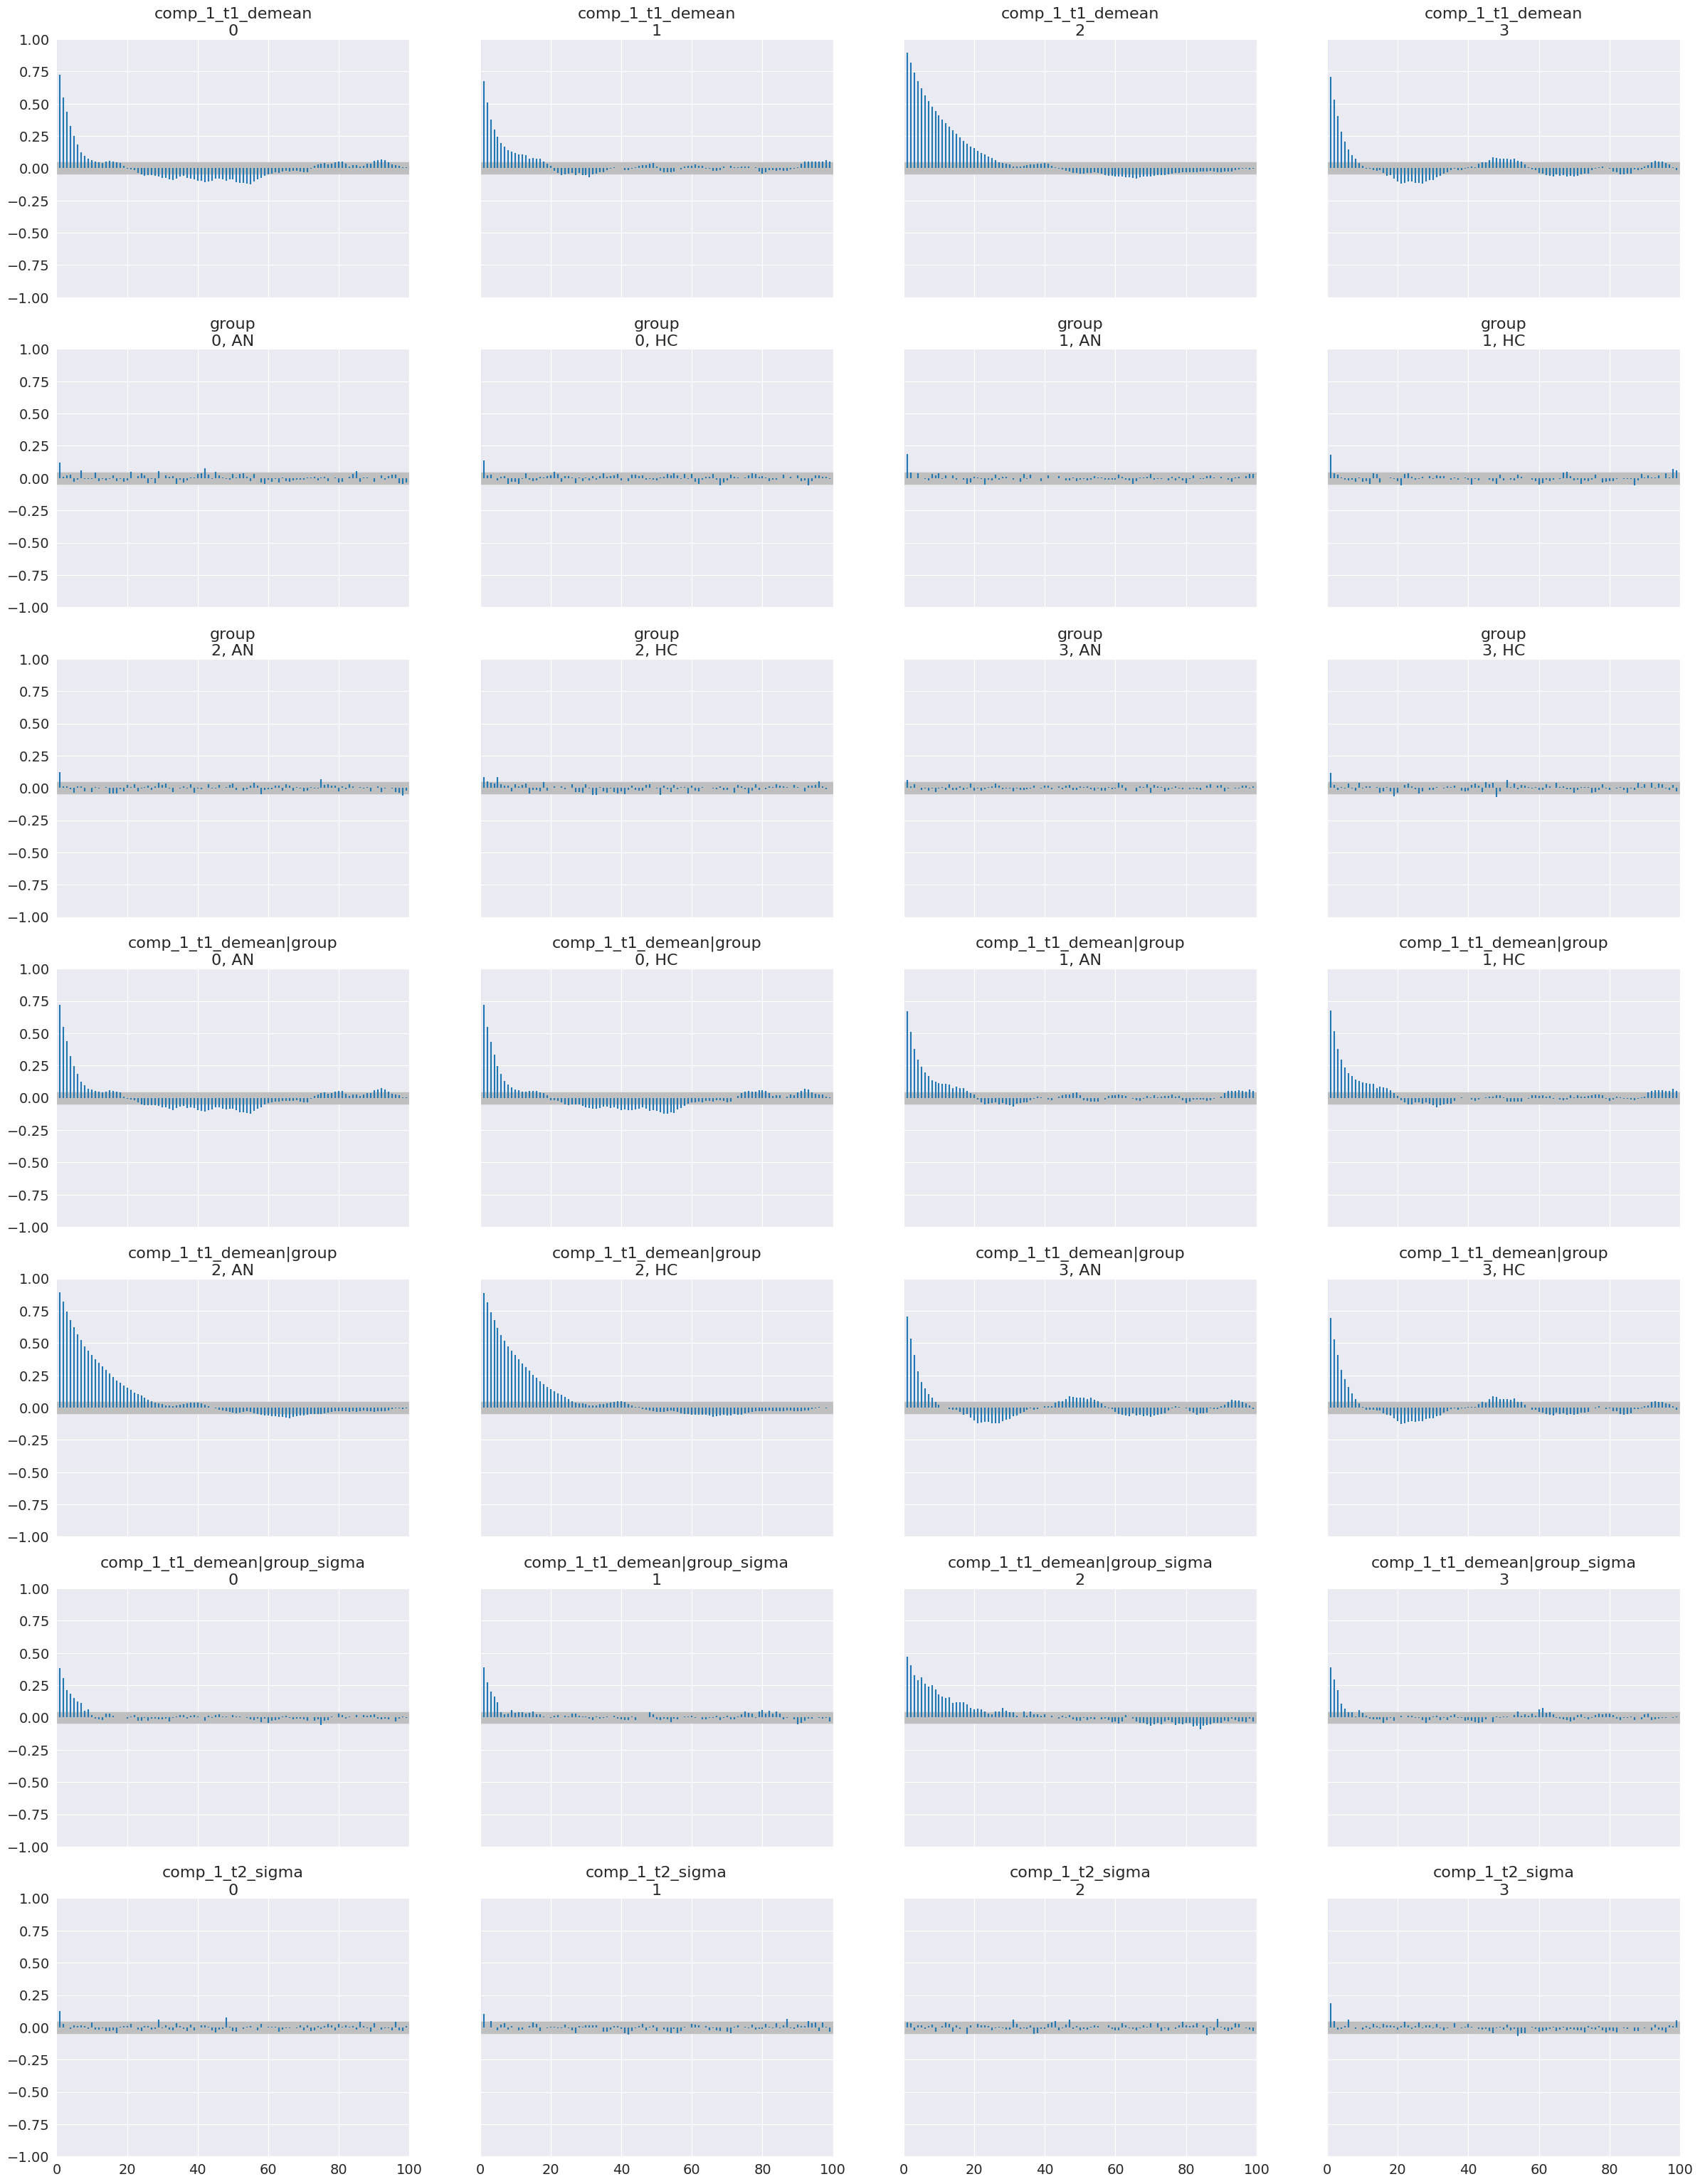

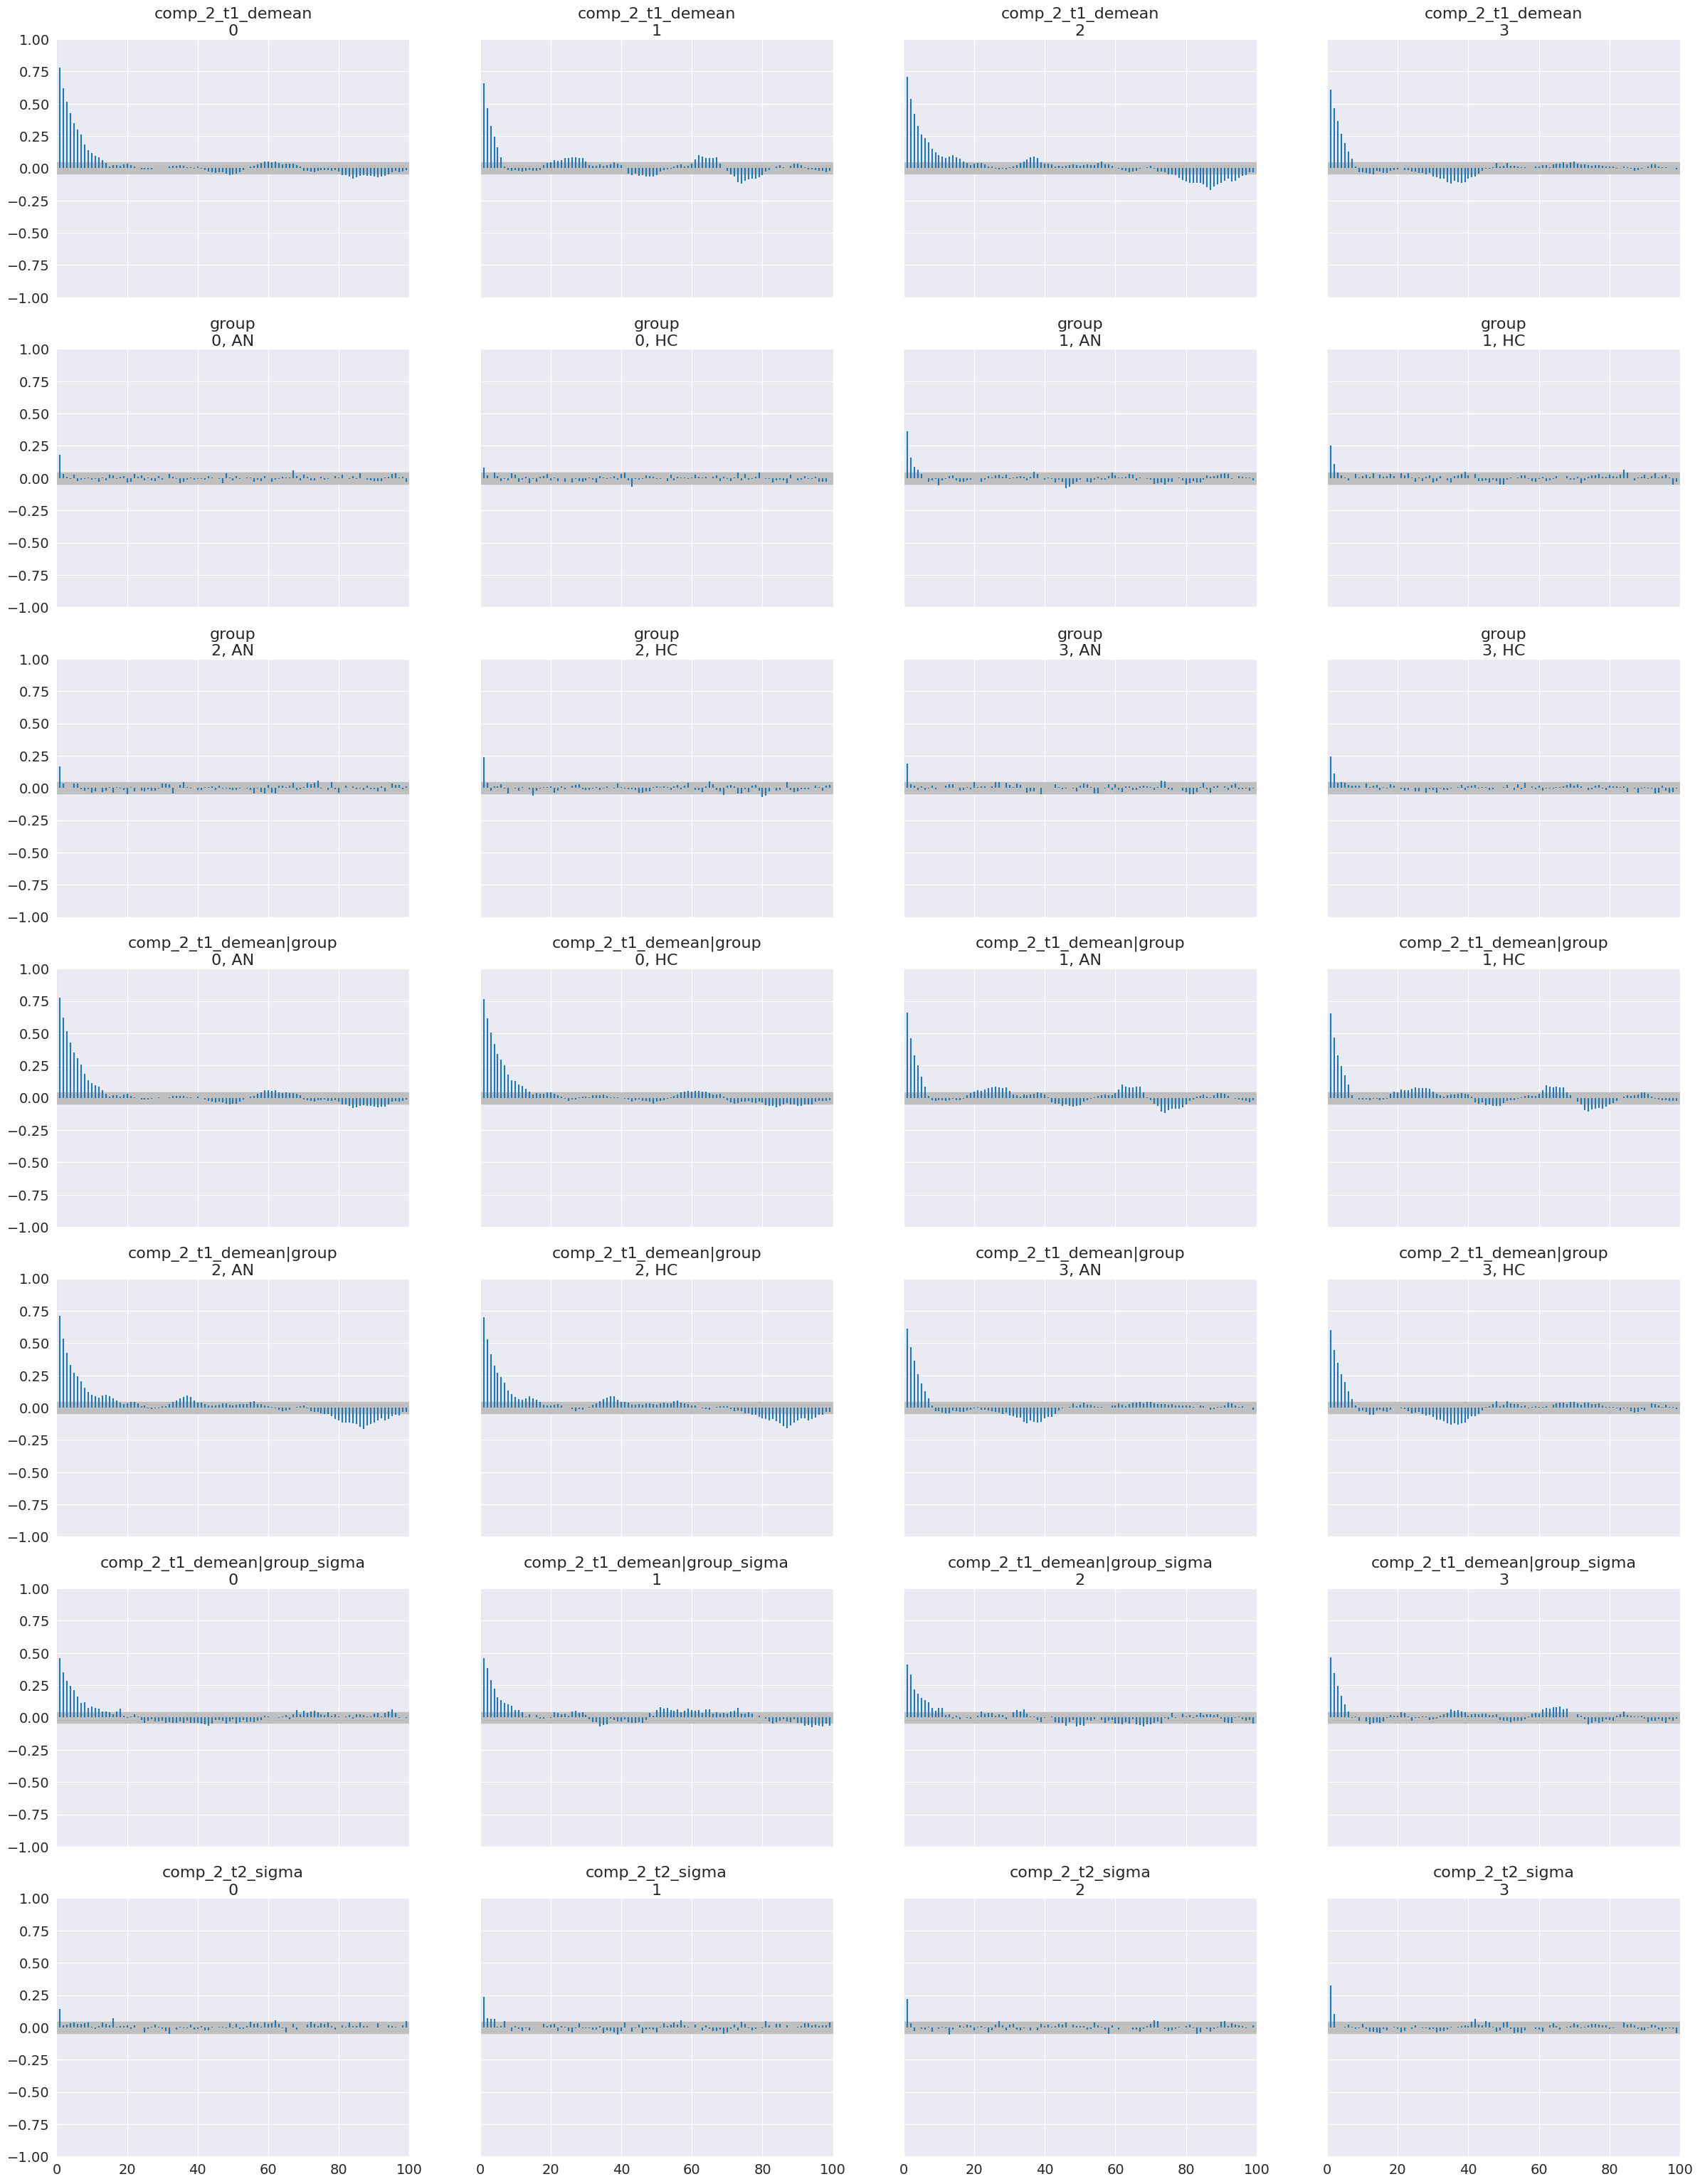

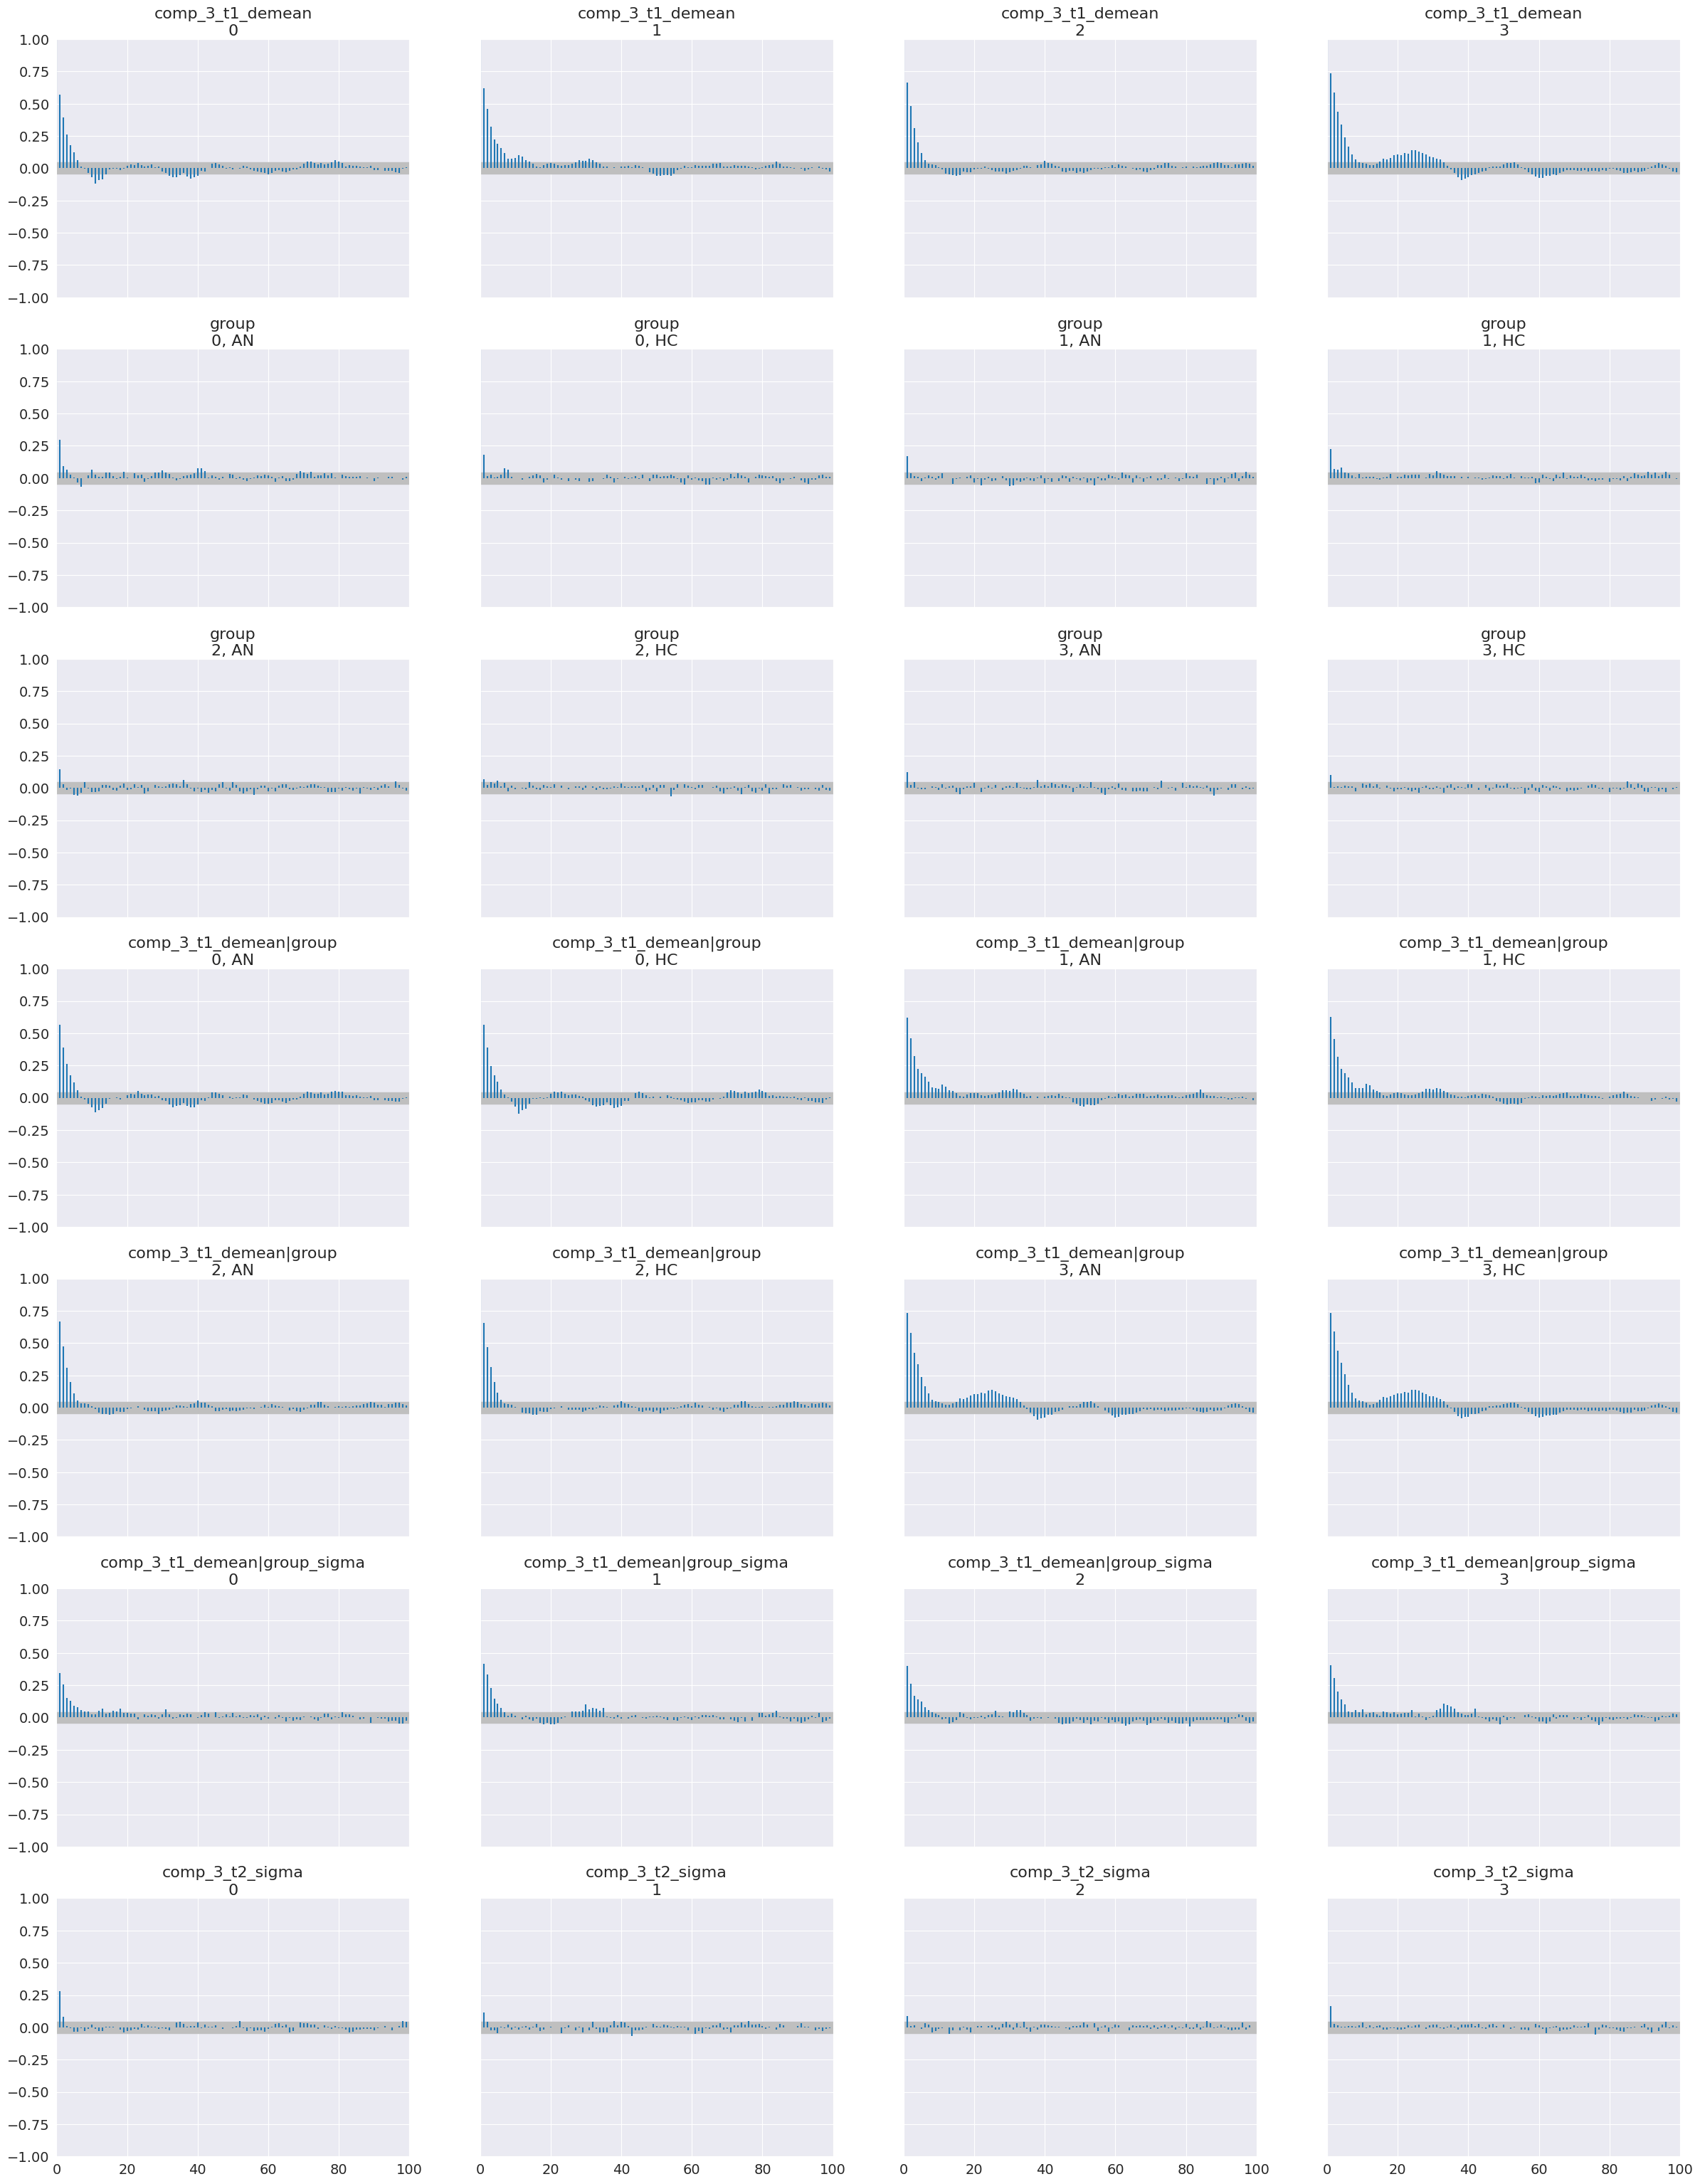

In [15]:
for model in comp:
    az.plot_autocorr(fitted_models['alternative'][model])

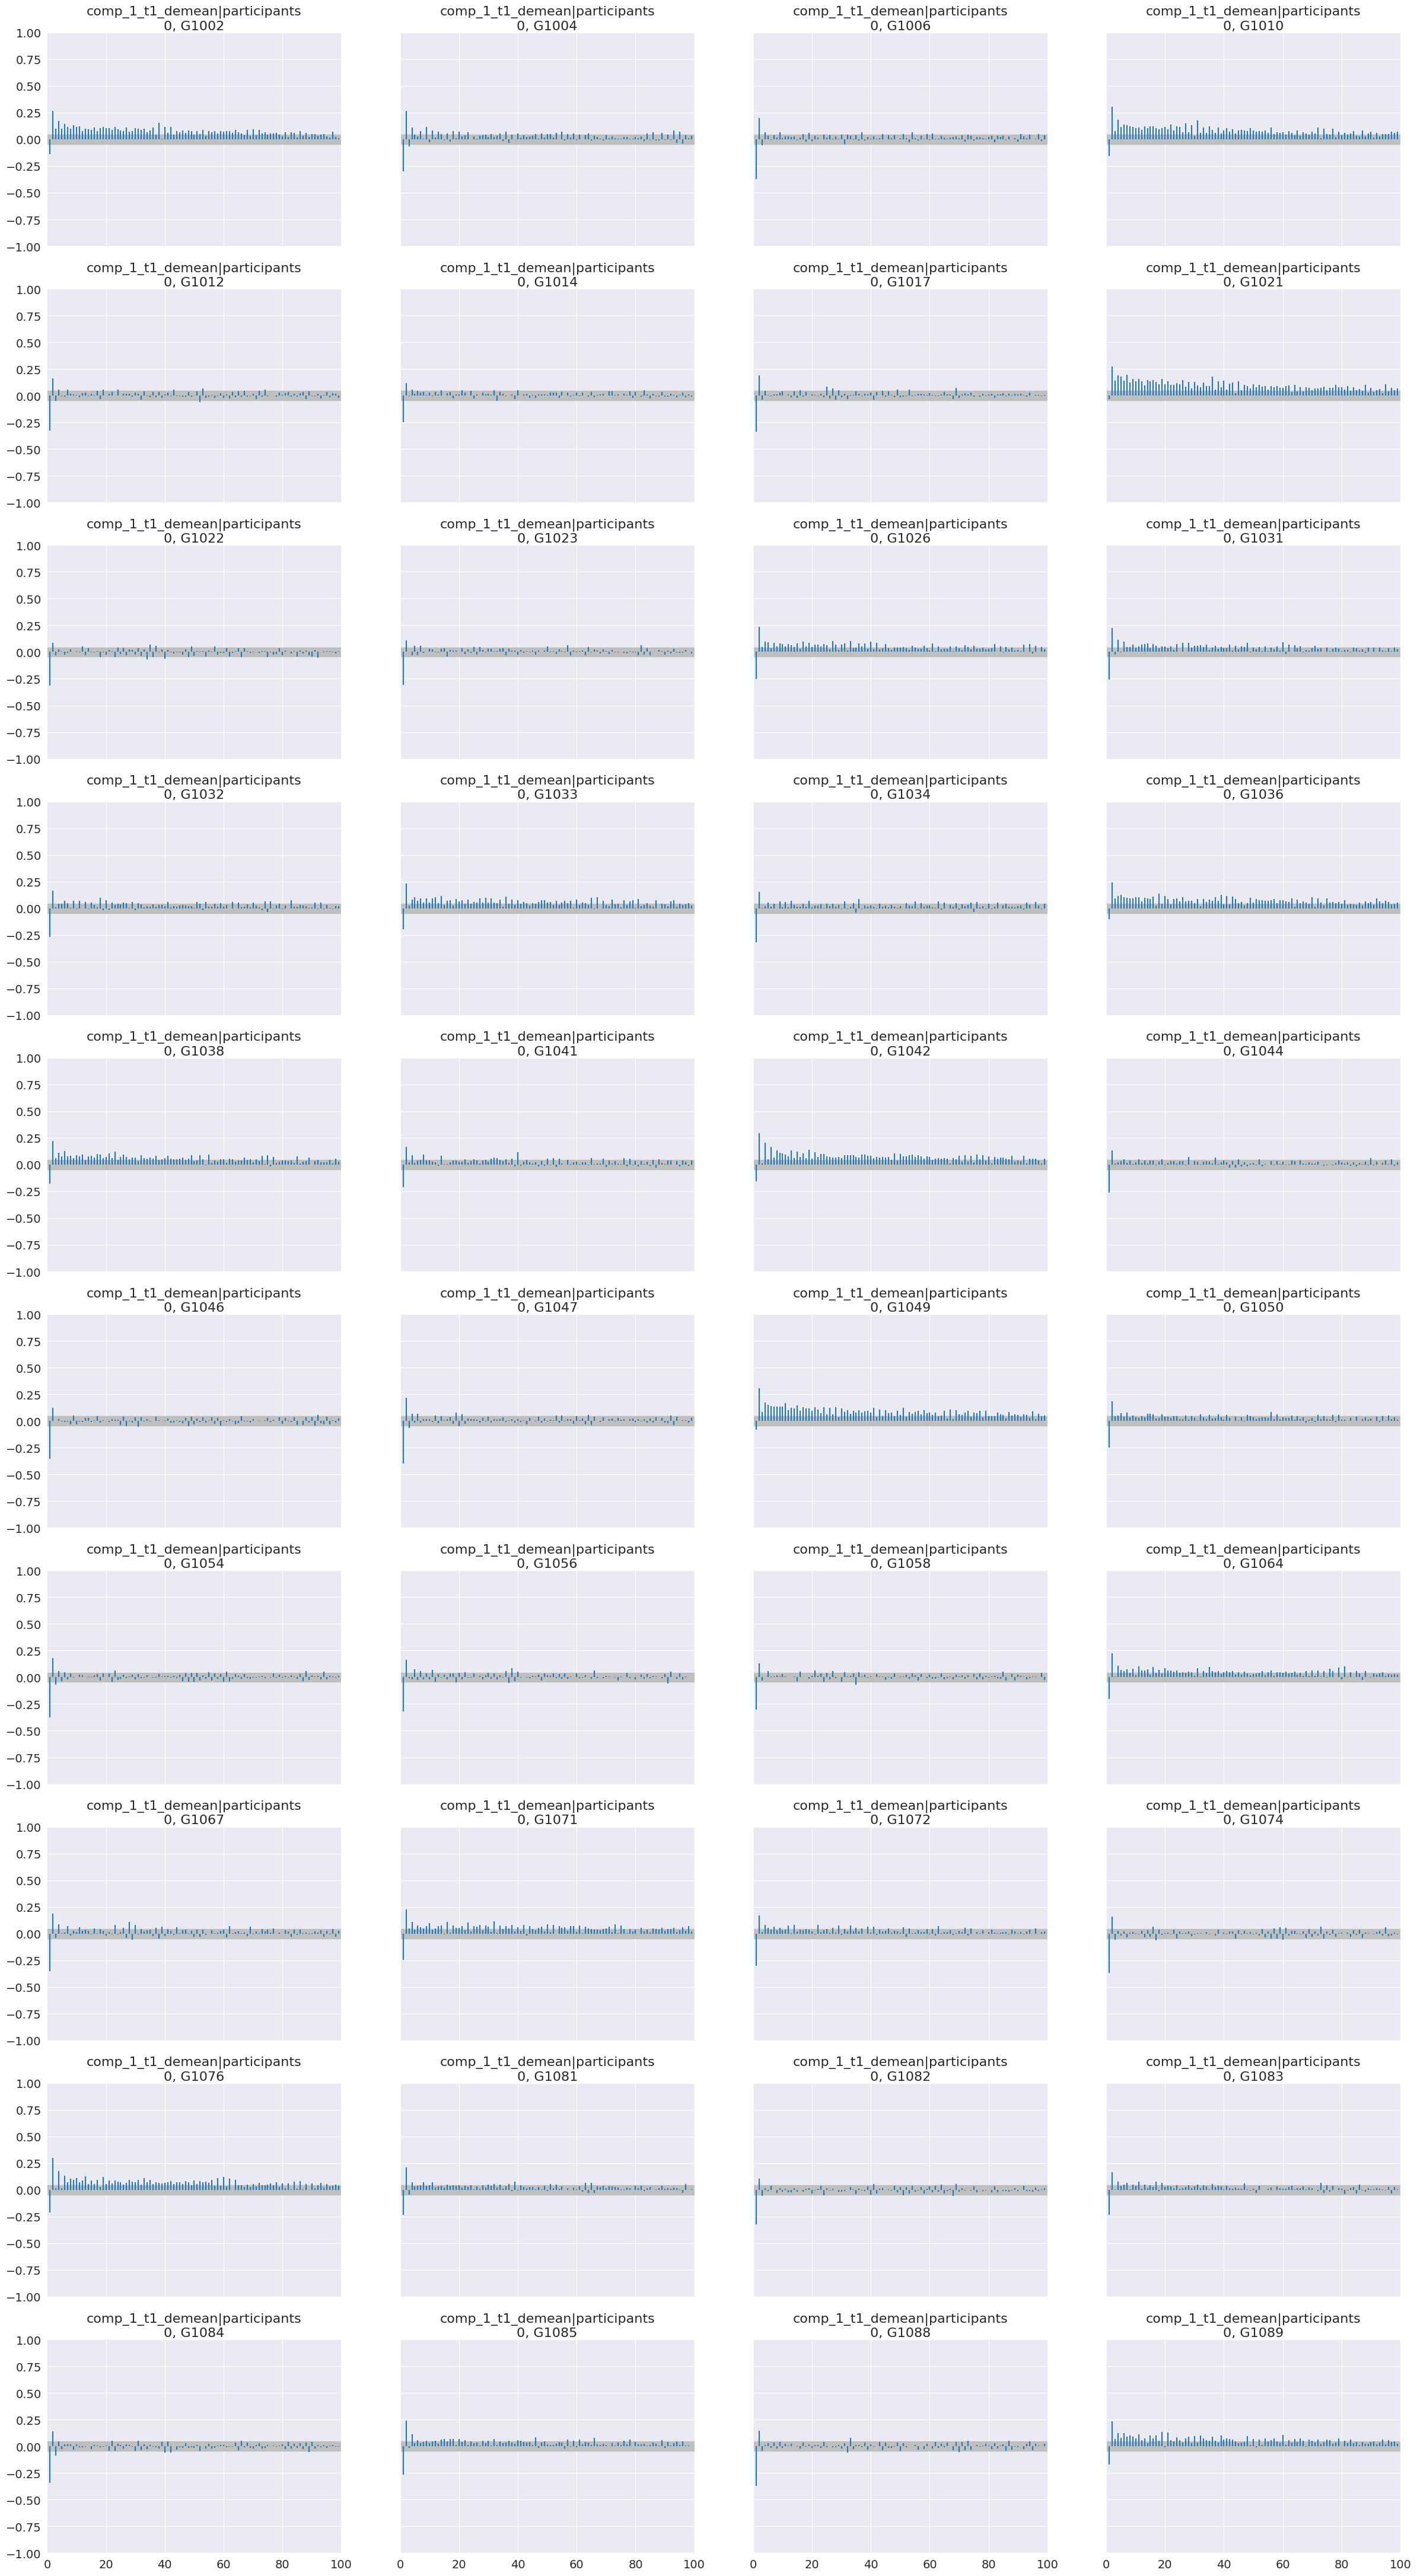

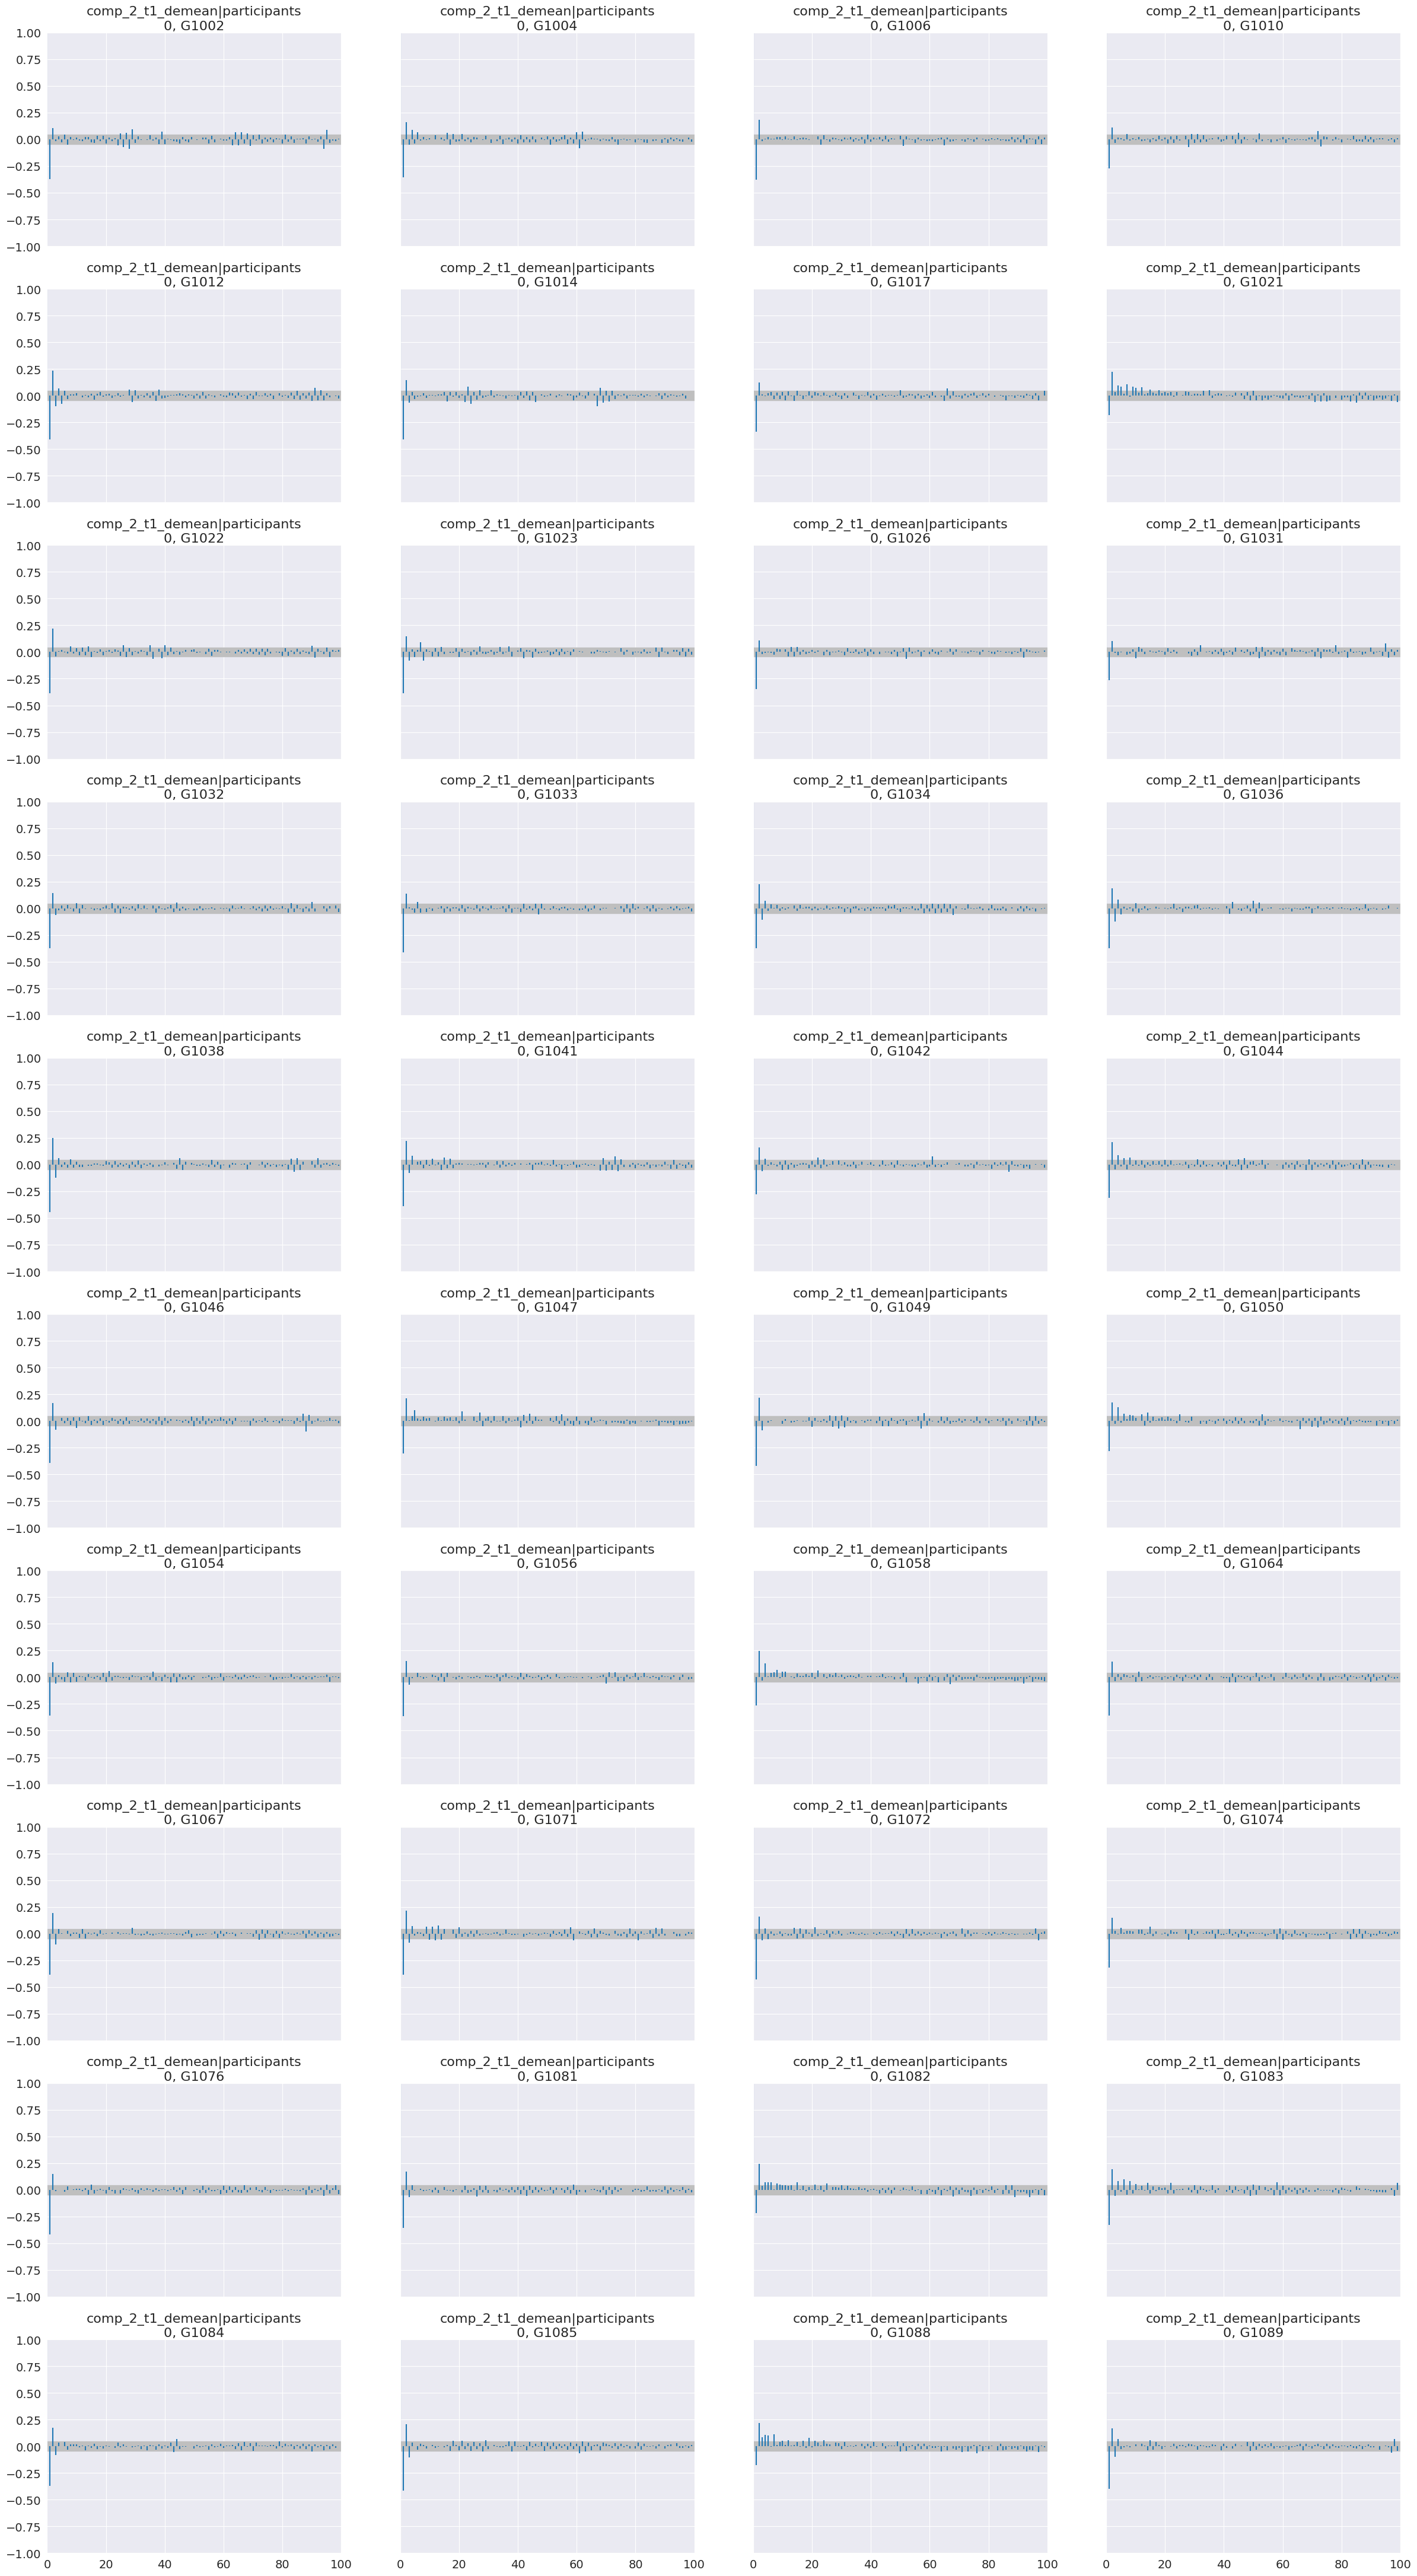

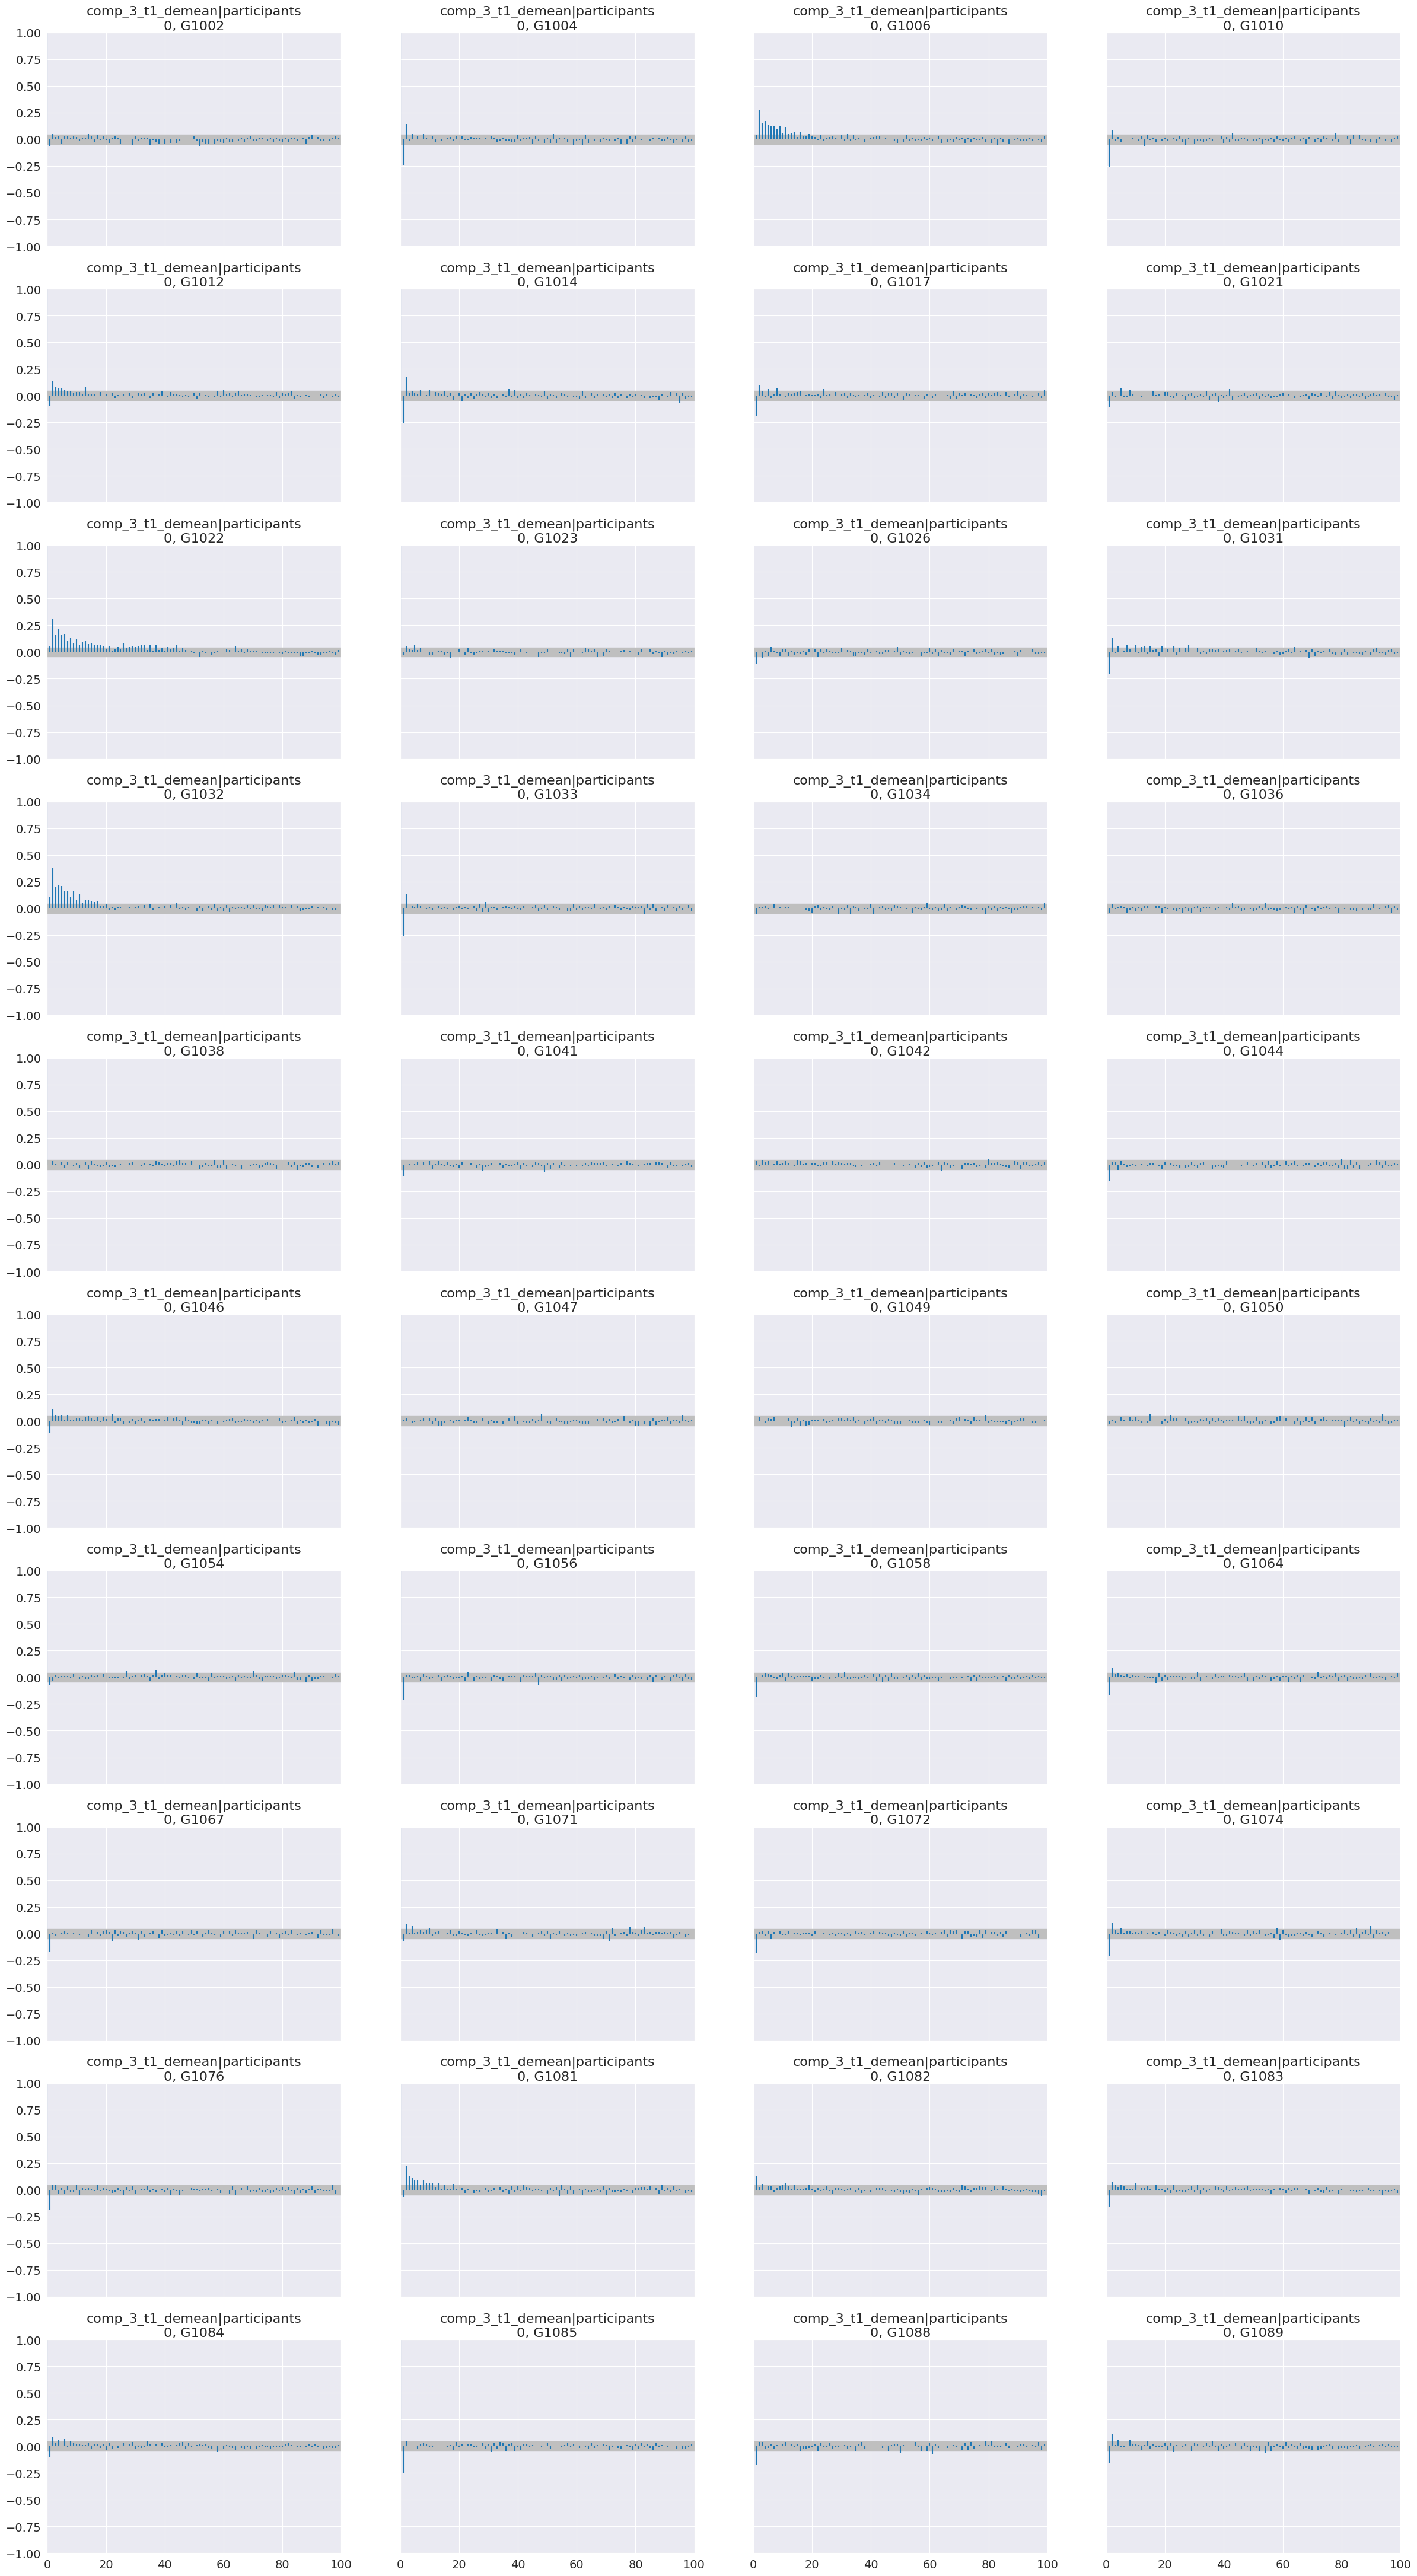

In [16]:
for model in comp:
    az.plot_autocorr(fitted_models['null'][model])

In [17]:
model_summary = {}

for component in comp:
    summary = az.summary(fitted_models['alternative'][component], hdi_prob=0.9)
    model_summary[component] = summary

In [23]:
save_pickle('model_summary_group', model_summary )

In [48]:
fitted_models = load_pickle('fitted_models')

In [24]:
import statsmodels.api as sm

data = pd.concat([pd.get_dummies(pca_df['group']), pca_df], axis=1).rename(columns={'AN':'group[AN]', 'HC':'group[HC]'}).dropna()
slopes = {}

for component in comp:
    # the names of the predictors
    varnames = ['group[AN]', 'group[HC]', f'{component}_t1_demean']
    
    # compute the needed statistics like R-squared when each predictor is response and all the
    # other predictors are the predictor
    
    # x_matrix = common effects design matrix (excluding intercept/constant term)
    terms = [t for t in models['alternative'][component].common_terms.values() if t.name != "Intercept"]
    x_matrix = [pd.DataFrame(x.data, columns=x.levels) for x in terms]
    x_matrix = pd.concat(x_matrix, axis=1)
    x_matrix.columns = varnames
    
    dm_statistics = {
        'r2_x': pd.Series(
            {
                x: sm.OLS(
                    endog=x_matrix[x],
                    exog=sm.add_constant(x_matrix.drop(x, axis=1))
                    if "Intercept" in models['alternative'][component].term_names
                    else x_matrix.drop(x, axis=1),
                )
                .fit()
                .rsquared
                for x in list(x_matrix.columns)
            }
        ),
        'sigma_x': x_matrix.std(),
        'mean_x': x_matrix.mean(axis=0),
    }
    r2_x = dm_statistics['r2_x']
    sd_x = dm_statistics['sigma_x']
    r2_y = pd.Series([sm.OLS(endog=data[f'{component}_t2'],
                             exog=sm.add_constant(data[[p for p in varnames if p != x]])).fit().rsquared
                      for x in varnames], index=varnames)
    sd_y = pca_df[f'{component}_t2'].std()
    
    # compute the products to multiply each slope with to produce the partial correlations
    slope_constant = (sd_x[varnames] / sd_y) * ((1 - r2_x[varnames]) / (1 - r2_y)) ** 0.5
    slopes[component] = slope_constant

In [25]:
correlation_coeffients = dict(zip([component for component in comp], [dict for component in comp]))

for component in comp:
    sample = fitted_models['alternative'][component].posterior['group']


    correlation_coeffients[component] = {
        'an_joint_posterior_distribution': sample.sel(group_dim="AN") * slopes[component]['group[AN]'],
        'hc_joint_posterior_distribution' : sample.sel(group_dim="HC") * slopes[component]['group[HC]'],
        'comp_joint_posterior_distribution' : fitted_models['alternative'][component].posterior[f'{component}_t1_demean'] * slopes[component][f'{component}_t1_demean']
    }

In [ ]:
save_pickle('correlation_coeffients_group', correlation_coeffients)